
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Sample Dataset :-



https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df1 = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

In [4]:
df1.sample(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4715,34,services,married,high.school,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
353,38,services,married,high.school,no,yes,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8665,36,admin.,married,basic.9y,no,no,no,telephone,jun,wed,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
4945,28,admin.,single,high.school,no,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
13952,41,services,married,professional.course,no,yes,yes,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
13251,26,blue-collar,married,basic.9y,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2501,50,services,married,unknown,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
4978,26,services,divorced,basic.6y,no,no,no,telephone,may,wed,...,15,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
12729,44,housemaid,married,high.school,no,yes,yes,cellular,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
2878,56,management,married,university.degree,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14770 entries, 0 to 14769
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             14770 non-null  int64  
 1   job             14770 non-null  object 
 2   marital         14770 non-null  object 
 3   education       14770 non-null  object 
 4   default         14770 non-null  object 
 5   housing         14770 non-null  object 
 6   loan            14770 non-null  object 
 7   contact         14770 non-null  object 
 8   month           14770 non-null  object 
 9   day_of_week     14770 non-null  object 
 10  duration        14770 non-null  int64  
 11  campaign        14770 non-null  int64  
 12  pdays           14770 non-null  int64  
 13  previous        14770 non-null  int64  
 14  poutcome        14770 non-null  object 
 15  emp.var.rate    14770 non-null  float64
 16  cons.price.idx  14770 non-null  float64
 17  cons.conf.idx   14769 non-null 

In [6]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     1
euribor3m         1
nr.employed       1
y                 1
dtype: int64

In [7]:
df1.shape

(14770, 21)

In [8]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,14770.000000,14770.000000,14770.000000,14770.0,14770.0,14770.000000,14770.000000,14769.000000,14769.000000,14769.000000
mean,39.809005,259.590183,2.769939,999.0,0.0,1.242322,94.119872,-39.121999,4.898086,5208.599201
std,9.071186,256.377464,3.150074,0.0,0.0,0.149808,0.225726,2.881065,0.049866,18.526244
min,20.000000,0.000000,1.000000,999.0,0.0,1.100000,93.000000,-42.700000,4.855000,5191.000000
25%,33.000000,107.000000,1.000000,999.0,0.0,1.100000,93.994000,-41.800000,4.857000,5191.000000
50%,39.000000,184.000000,2.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.864000,5191.000000
75%,46.000000,321.000000,3.000000,999.0,0.0,1.400000,94.465000,-36.400000,4.960000,5228.100000
max,61.000000,3643.000000,56.000000,999.0,0.0,1.400000,94.465000,-36.400000,4.967000,5228.100000


In [9]:
df1.duplicated().sum()

3

In [10]:
df1 = df1.groupby(df1.columns.tolist(),as_index=False).mean()

In [11]:
df1.duplicated().sum()

0

In [12]:
cat_cols = df1.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df1.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


<Axes: xlabel='age', ylabel='Count'>

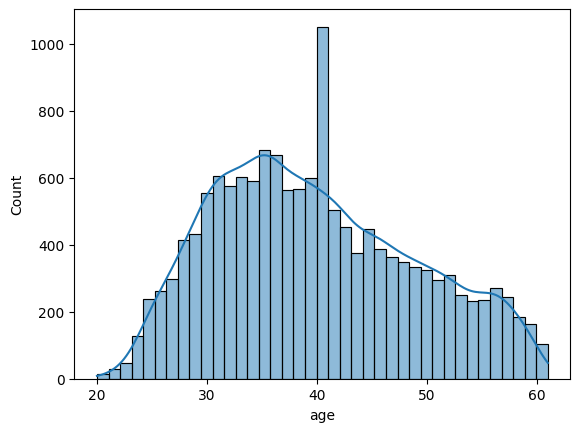

In [13]:
# histplot of age:
# kde:
sns.histplot(df1['age'], kde=True)

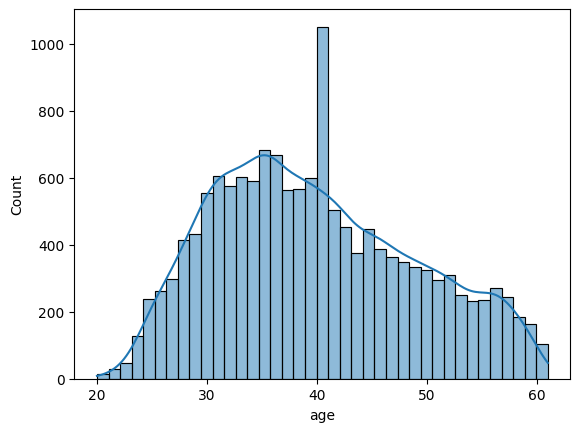

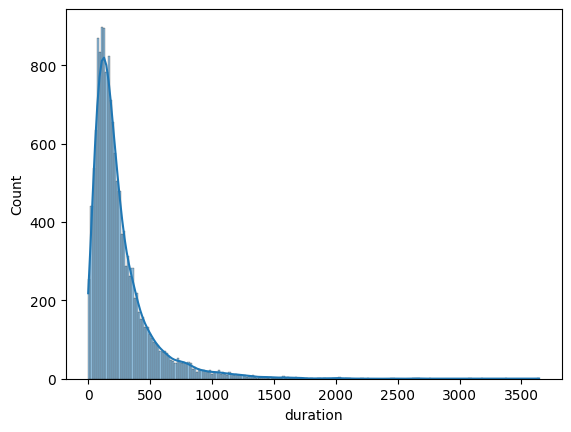

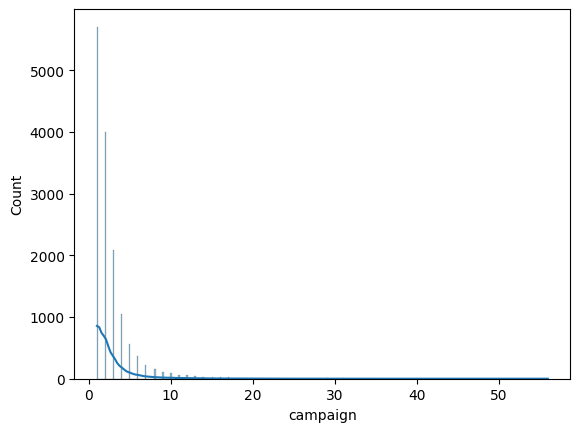

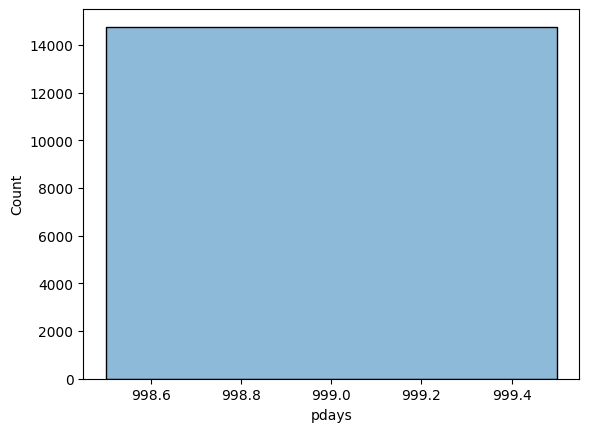

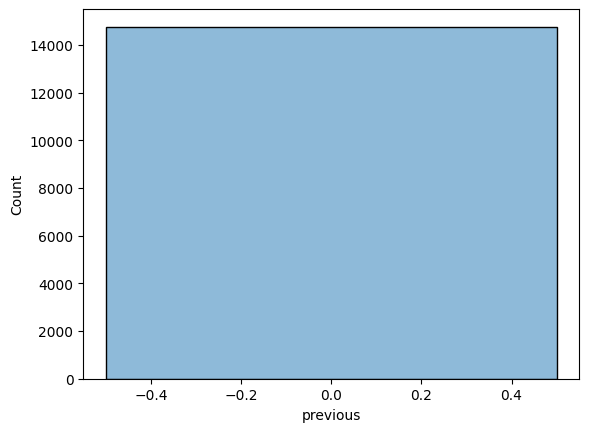

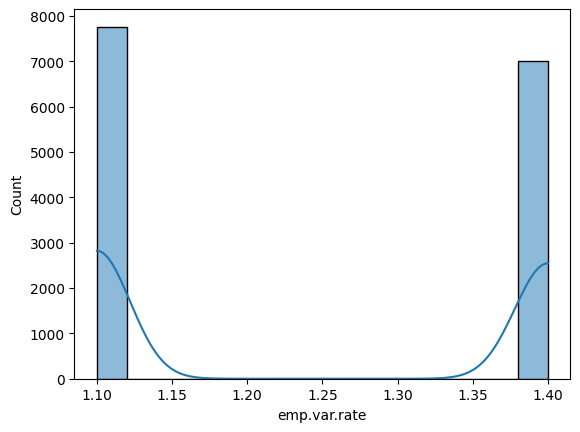

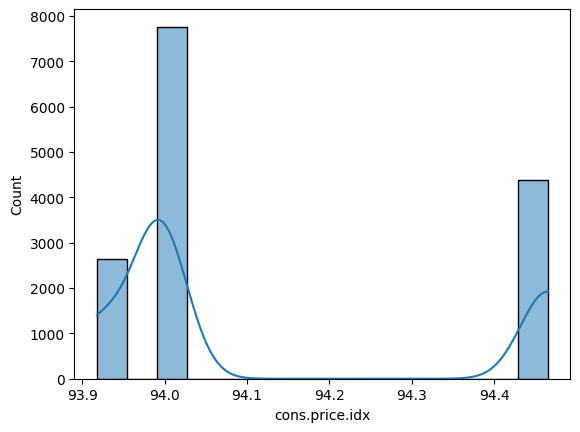

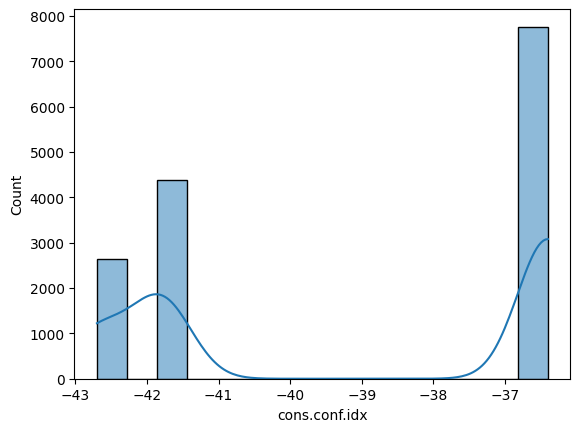

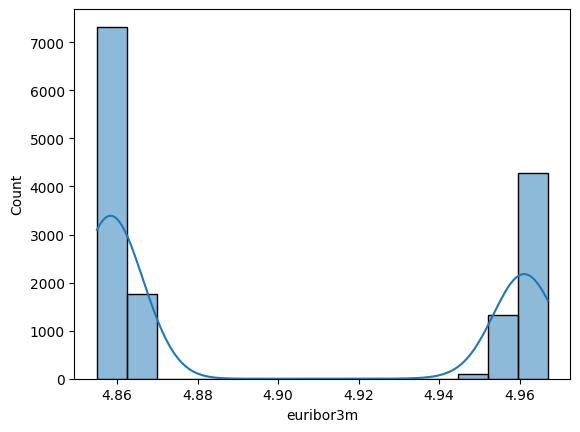

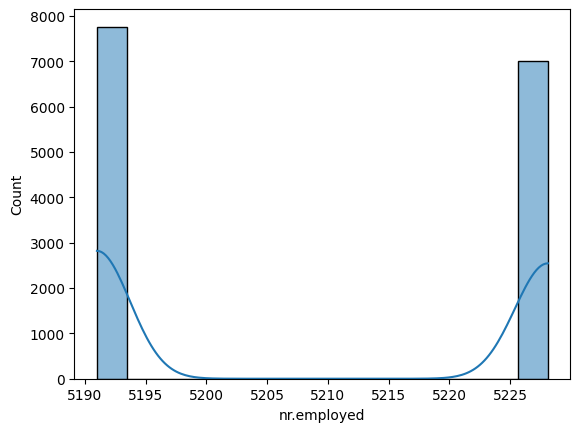

In [14]:
# all numerical columns histplot
for col in num_cols:
    sns.histplot(df1[col], kde=True)
    plt.show()

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


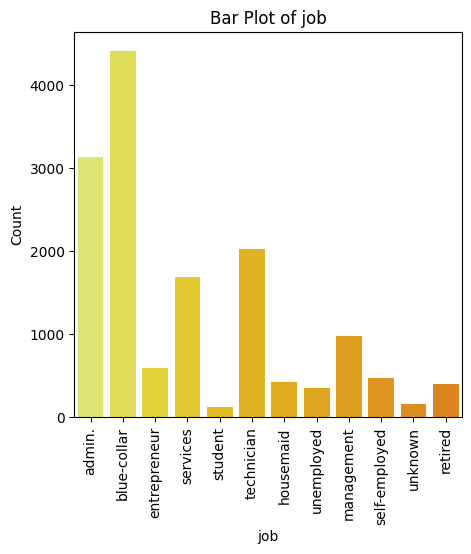

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


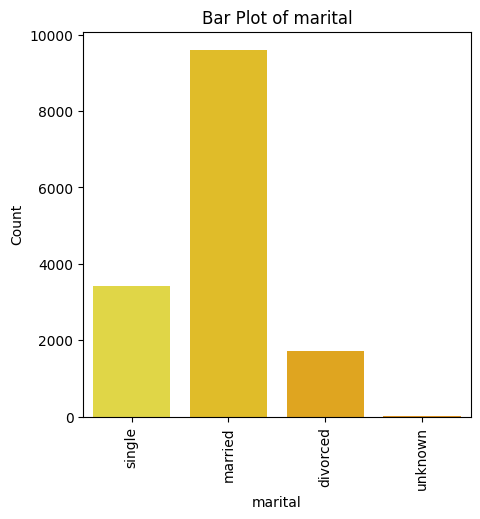

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


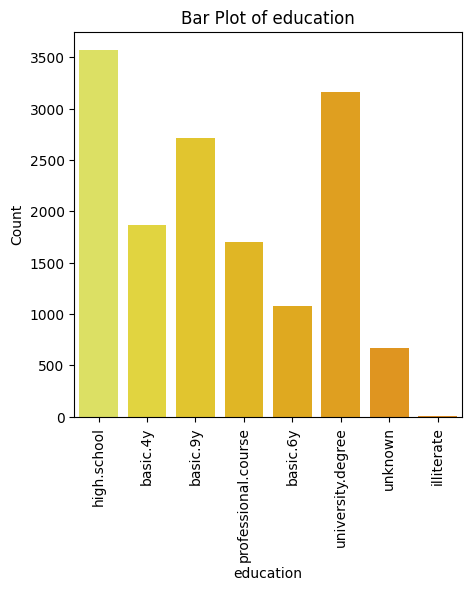

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


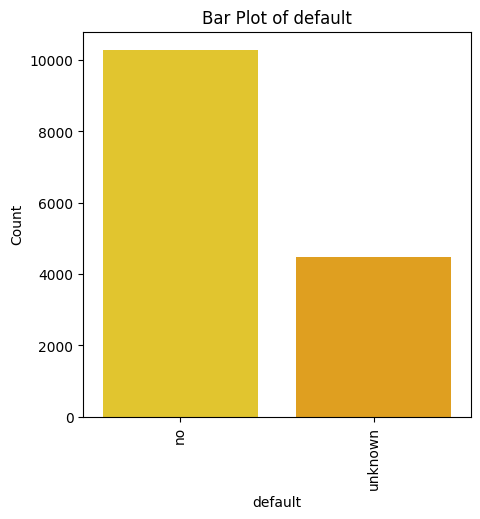

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


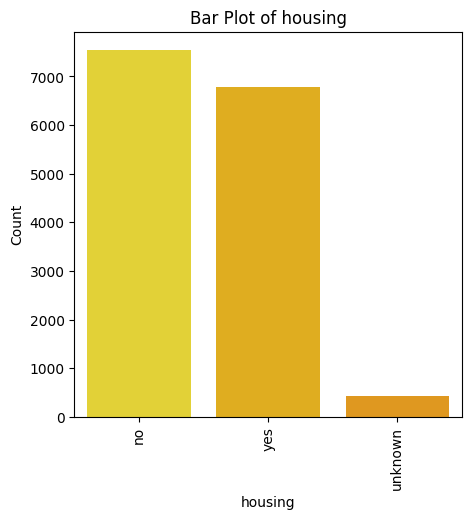

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


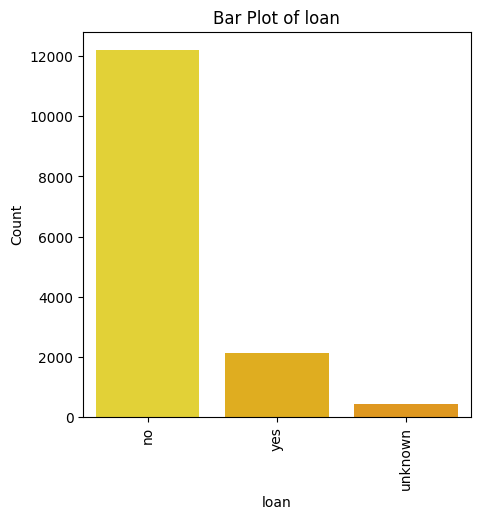

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


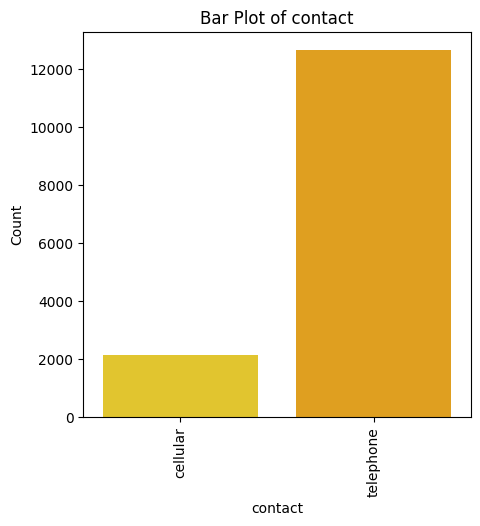

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


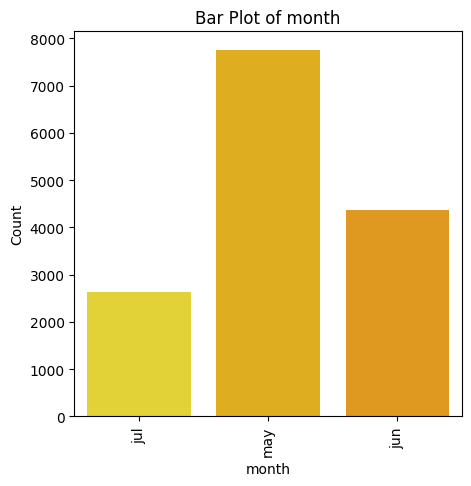

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


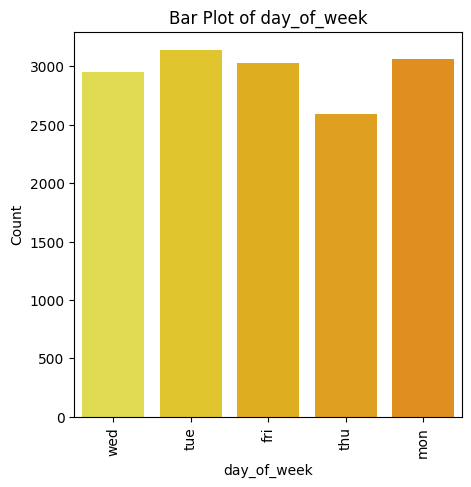

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


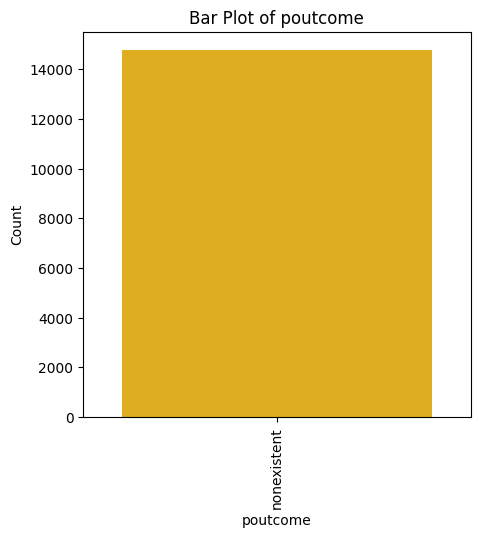

<ipython-input-15-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


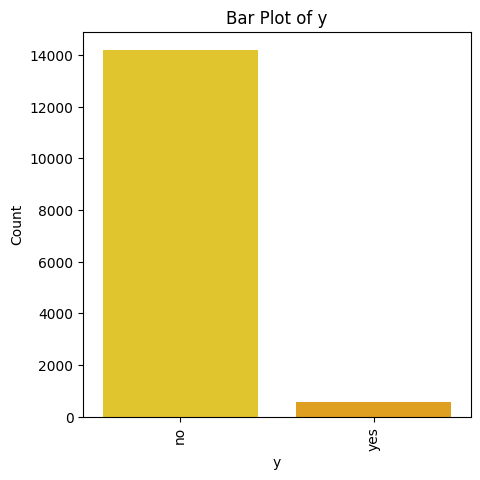

In [15]:
# bar plot for categorical columns
for feature in cat_cols:
    plt.figure(figsize=(5,5))  # Adjust the figure size as needed
    sns.countplot(x=feature, data=df1, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

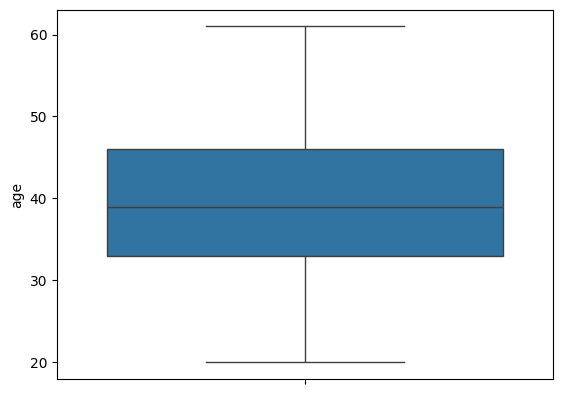

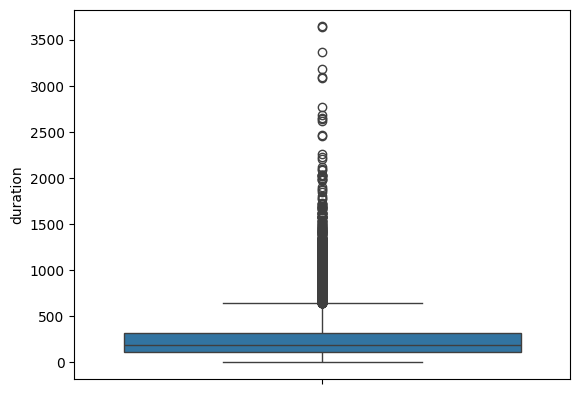

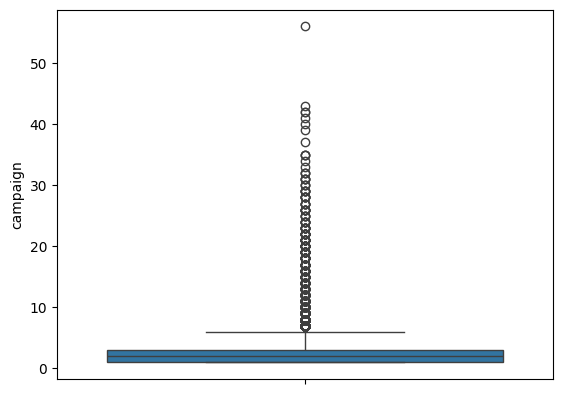

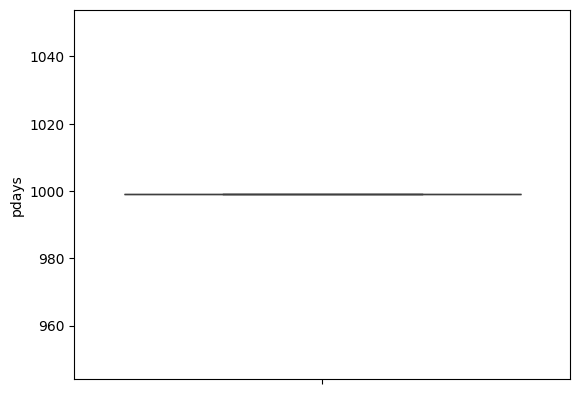

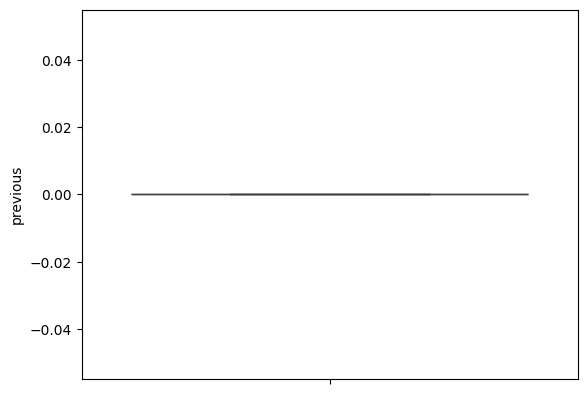

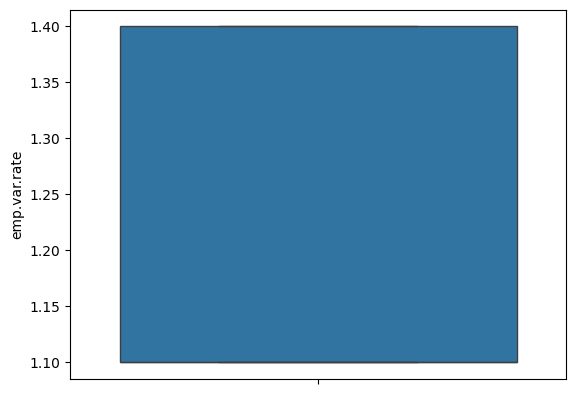

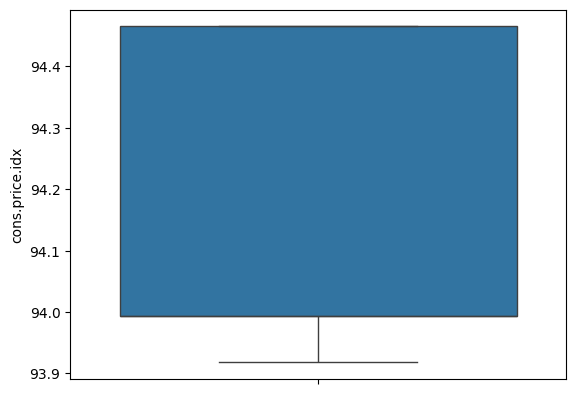

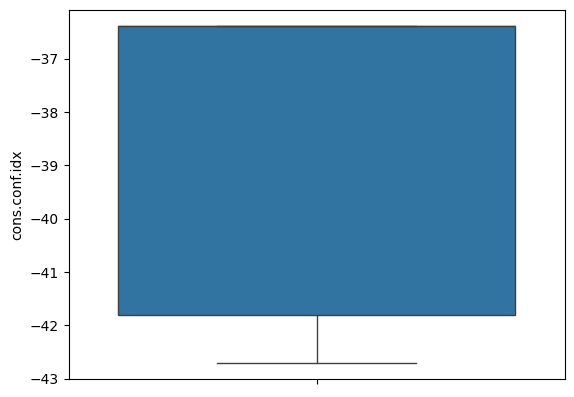

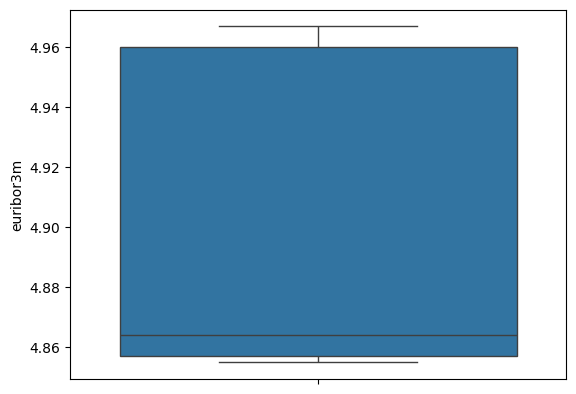

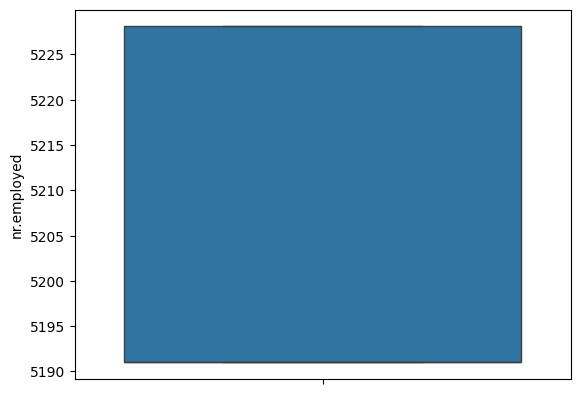

In [16]:
# box plot of all numerical columns
for col in num_cols:
    sns.boxplot(df1[col])
    plt.show()

In [17]:
df1[num_cols].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.012323,0.007036,NaN,NaN,-0.060003,0.047230,0.070305,-0.068382,-0.060003
duration,-0.012323,1.000000,-0.076109,NaN,NaN,-0.022619,-0.054552,0.017182,-0.017419,-0.022619
campaign,0.007036,-0.076109,1.000000,NaN,NaN,0.086080,0.119375,-0.076755,0.073746,0.086080
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp.var.rate,-0.060003,-0.022619,0.086080,NaN,NaN,1.000000,0.588021,-0.994557,0.853300,1.000000
cons.price.idx,0.047230,-0.054552,0.119375,NaN,NaN,0.588021,1.000000,-0.500546,0.339946,0.588021
cons.conf.idx,0.070305,0.017182,-0.076755,NaN,NaN,-0.994557,-0.500546,1.000000,-0.869499,-0.994557
euribor3m,-0.068382,-0.017419,0.073746,NaN,NaN,0.853300,0.339946,-0.869499,1.000000,0.853300
nr.employed,-0.060003,-0.022619,0.086080,NaN,NaN,1.000000,0.588021,-0.994557,0.853300,1.000000


<Axes: >

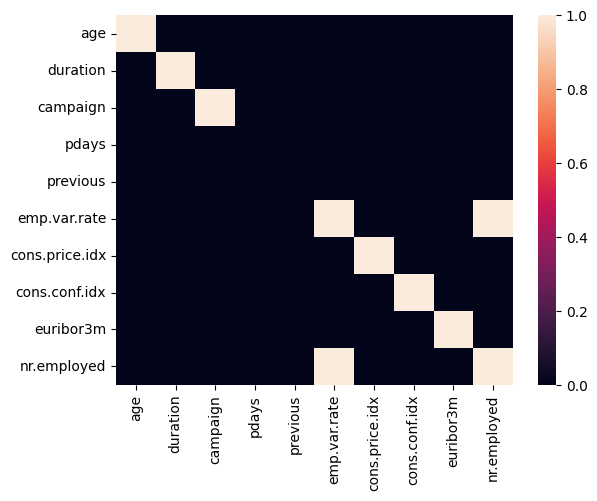

In [18]:
# heatmap of this correlation
sns.heatmap(df1[num_cols].corr()>0.9)

In [19]:
# label encoder on the output column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['y'] = le.fit_transform(df1['y'])

In [20]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,20,admin.,single,high.school,no,no,no,cellular,jul,wed,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
1,20,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
2,20,entrepreneur,single,high.school,no,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
3,20,entrepreneur,single,high.school,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
4,20,entrepreneur,single,high.school,no,no,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


In [21]:
# values in education column
df1['education'].value_counts()

education
high.school            3570
university.degree      3160
basic.9y               2713
basic.4y               1866
professional.course    1699
basic.6y               1082
unknown                 671
illiterate                5
Name: count, dtype: int64

In [22]:
# ordinal encoding on the education column

# Illiterate is the least important, so it gets the lowest number, 1.
# University.degree is the most important, so it gets the highest number, 8.
from sklearn.preprocessing import OrdinalEncoder

categories = [['illiterate', 'unknown', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']]
enc = OrdinalEncoder(categories = categories)
df1['education'] = enc.fit_transform(df1[['education']])

In [23]:
# ordinal encoding on the job column
# the order of importance for job categories is as follows:
# more important = higher number
categories = [['unknown', 'student','unemployed','retired','housemaid', 'blue-collar', 'services', 'self-employed', 'technician', 'admin.', 'entrepreneur', 'management']]
enc = OrdinalEncoder(categories = categories)
df1['job'] = enc.fit_transform(df1[['job']])

In [24]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,20,9.0,single,5.0,no,no,no,cellular,jul,wed,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
1,20,5.0,married,2.0,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
2,20,10.0,single,5.0,no,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
3,20,10.0,single,5.0,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
4,20,10.0,single,5.0,no,no,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


In [25]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [26]:
df1['duration']

0        208
1        285
2        217
3        238
4        598
        ... 
14761    112
14762    112
14763     33
14764    211
14765     99
Name: duration, Length: 14766, dtype: int64

In [27]:
# one hot encoding on the columns = marital, housing, loan, contact, month, day_of_week, poutcome
df1 = pd.get_dummies(df1, columns = ['marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [28]:
df1.head()

,age,job,education,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,contact_telephone,month_jul,month_jun,month_may,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent
0,20,9.0,5.0,no,208,4,999,0,1.4,93.918,...,False,True,False,False,False,False,False,False,True,True
1,20,5.0,2.0,no,285,1,999,0,1.4,93.918,...,False,True,False,False,False,False,False,True,False,True
2,20,10.0,5.0,no,217,2,999,0,1.1,93.994,...,True,False,False,True,True,False,False,False,False,True
3,20,10.0,5.0,no,238,1,999,0,1.1,93.994,...,True,False,False,True,False,False,True,False,False,True
4,20,10.0,5.0,no,598,3,999,0,1.1,93.994,...,True,False,False,True,False,False,True,False,False,True


In [29]:
df1.head()

,age,job,education,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,contact_telephone,month_jul,month_jun,month_may,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent
0,20,9.0,5.0,no,208,4,999,0,1.4,93.918,...,False,True,False,False,False,False,False,False,True,True
1,20,5.0,2.0,no,285,1,999,0,1.4,93.918,...,False,True,False,False,False,False,False,True,False,True
2,20,10.0,5.0,no,217,2,999,0,1.1,93.994,...,True,False,False,True,True,False,False,False,False,True
3,20,10.0,5.0,no,238,1,999,0,1.1,93.994,...,True,False,False,True,False,False,True,False,False,True
4,20,10.0,5.0,no,598,3,999,0,1.1,93.994,...,True,False,False,True,False,False,True,False,False,True


In [30]:
df1.shape

(14766, 35)

In [31]:
df1.replace(['yes', 'true'], 1, inplace=True)
df1.replace(['no', 'unknown', 'false'], 0, inplace=True)

In [32]:
df1.head()

,age,job,education,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,contact_telephone,month_jul,month_jun,month_may,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent
0,20,9.0,5.0,0,208,4,999,0,1.4,93.918,...,False,True,False,False,False,False,False,False,True,True
1,20,5.0,2.0,0,285,1,999,0,1.4,93.918,...,False,True,False,False,False,False,False,True,False,True
2,20,10.0,5.0,0,217,2,999,0,1.1,93.994,...,True,False,False,True,True,False,False,False,False,True
3,20,10.0,5.0,0,238,1,999,0,1.1,93.994,...,True,False,False,True,False,False,True,False,False,True
4,20,10.0,5.0,0,598,3,999,0,1.1,93.994,...,True,False,False,True,False,False,True,False,False,True


In [33]:
X = df1.drop('y', axis=1)
y = df1['y']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [36]:
y_pred = dt.predict(X_test)
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.960054163845633

In [37]:
# precision, recall, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.5204081632653061
Recall: 0.4180327868852459
F1 Score: 0.4636363636363637


In [38]:
# make decison tree
# with column names
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()

In [39]:
# dtreeviz visualization
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 981.8 kB/s eta 0:00:00


In [42]:
import graphviz.backend as be
import dtreeviz

In [43]:
viz = dtreeviz.model(dt, X_train, y_train, target_name='y', feature_names=X.columns)
viz

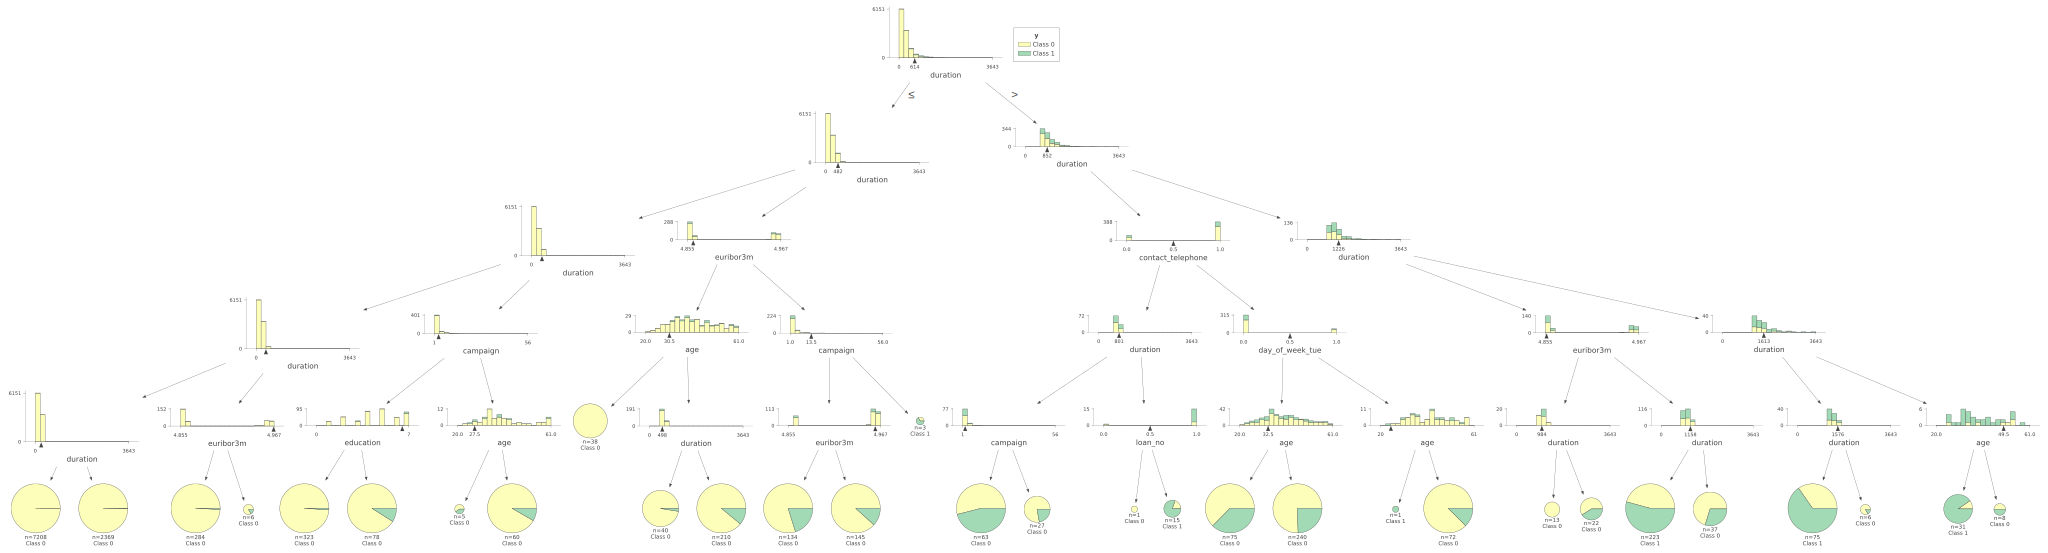

In [47]:
# view visualization
viz.view()